<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/desafio_modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
nome_do_arquivo="comp_bikes_mod.csv"
base = pd.read_csv(nome_do_arquivo)

In [4]:
base.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [5]:
base.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
base.shape

(17379, 17)

In [ ]:
print('Tipos de dados existentes no dataset: \n{}'.format(base.dtypes.value_counts()))

Tipos de dados existentes no dataset: 
float64    16
object      1
dtype: int64


In [ ]:
print('Tipos de dados existentes no dataset: \n{}'.format(base.dtypes.nunique()))

Tipos de dados existentes no dataset: 
2


In [ ]:
base[['temp']].isna().sum()

temp    1738
dtype: int64

In [7]:
(base[['temp']].isna().sum() / 17378) * 100

temp    10.001151
dtype: float64

In [8]:
base.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [9]:
base.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [10]:
# Elimina as linhas com NAN de uma coluna especificada e atualiza o dataset
base.dropna(subset = ["dteday"], inplace=True)

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [ ]:
base.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
base["season"] = base["season"].astype('category')


In [13]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     14060 non-null  float64 
 1   dteday      15641 non-null  object  
 2   season      14061 non-null  category
 3   yr          14076 non-null  float64 
 4   mnth        14062 non-null  float64 
 5   hr          14068 non-null  float64 
 6   holiday     14076 non-null  float64 
 7   weekday     14078 non-null  float64 
 8   workingday  14097 non-null  float64 
 9   weathersit  14078 non-null  float64 
 10  temp        14066 non-null  float64 
 11  atemp       14076 non-null  float64 
 12  hum         14070 non-null  float64 
 13  windspeed   14082 non-null  float64 
 14  casual      14071 non-null  float64 
 15  registered  14090 non-null  float64 
 16  cnt         14079 non-null  float64 
dtypes: category(1), float64(15), object(1)
memory usage: 2.0+ MB


In [14]:
base['season'].nunique()

4

In [ ]:
base[['season']].nunique()

season    4
dtype: int64

In [ ]:
base[['temp']].mean()

temp    0.496926
dtype: float64

In [ ]:
base[['windspeed']].std()

windspeed    0.122309
dtype: float64

,season
count,14061.000000
mean,2.507930
std,1.110674
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


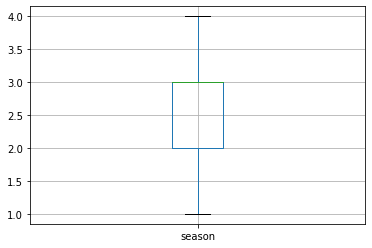

In [ ]:
base[["season"]].boxplot()
base[["season"]].describe()

In [ ]:
#base.loc[base.season == 1, 'season'] = 'winter'
#base.loc[base.season == 2, 'season'] = 'spring'
#base.loc[base.season == 3, 'season'] = 'summer'
#base.loc[base.season == 4, 'season'] = 'fall'

In [15]:
base['dteday'] = pd.to_datetime(base.dteday)

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [20]:
base['dteday'].max()

Timestamp('2012-12-31 00:00:00')

In [21]:
base.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


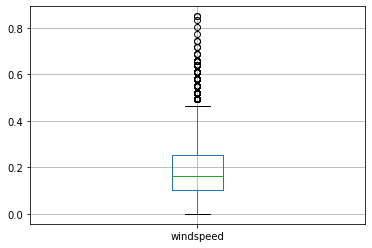

In [ ]:
#Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
base[["windspeed"]].boxplot()

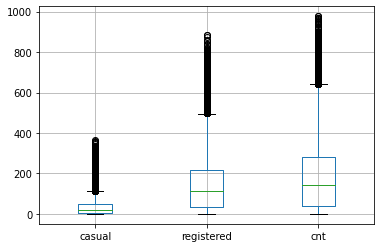

In [ ]:
base[["casual","registered","cnt"]].boxplot()

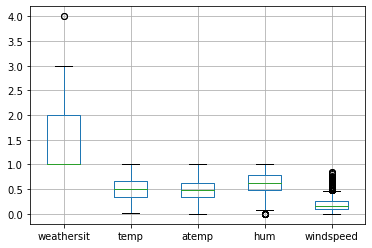

In [ ]:
base[["weathersit","temp","atemp","hum","windspeed"]].boxplot()

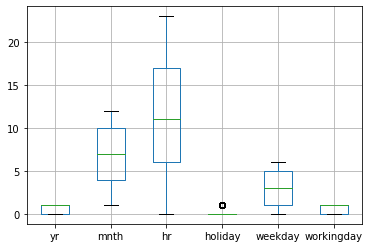

In [22]:
base[["season","yr","mnth","hr","holiday","weekday","workingday"]].boxplot()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
sns.set_style("whitegrid")
labels = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

base_nova = base[labels].dropna()
base_nova.columns = labels

In [30]:
base_nova.head()

,temp,atemp,hum,windspeed,cnt
1,0.22,0.2727,0.80,0.0000,40.0
2,0.22,0.2727,0.80,0.0000,32.0
3,0.24,0.2879,0.75,0.0000,13.0
4,0.24,0.2879,0.75,0.0000,1.0
5,0.24,0.2576,0.75,0.0896,1.0


In [31]:
corr = base_nova.corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.988241,-0.075071,-0.018934,0.408175
atemp,0.988241,1.000000,-0.056168,-0.056270,0.404158
hum,-0.075071,-0.056168,1.000000,-0.292059,-0.329415
windspeed,-0.018934,-0.056270,-0.292059,1.000000,0.097594
cnt,0.408175,0.404158,-0.329415,0.097594,1.000000


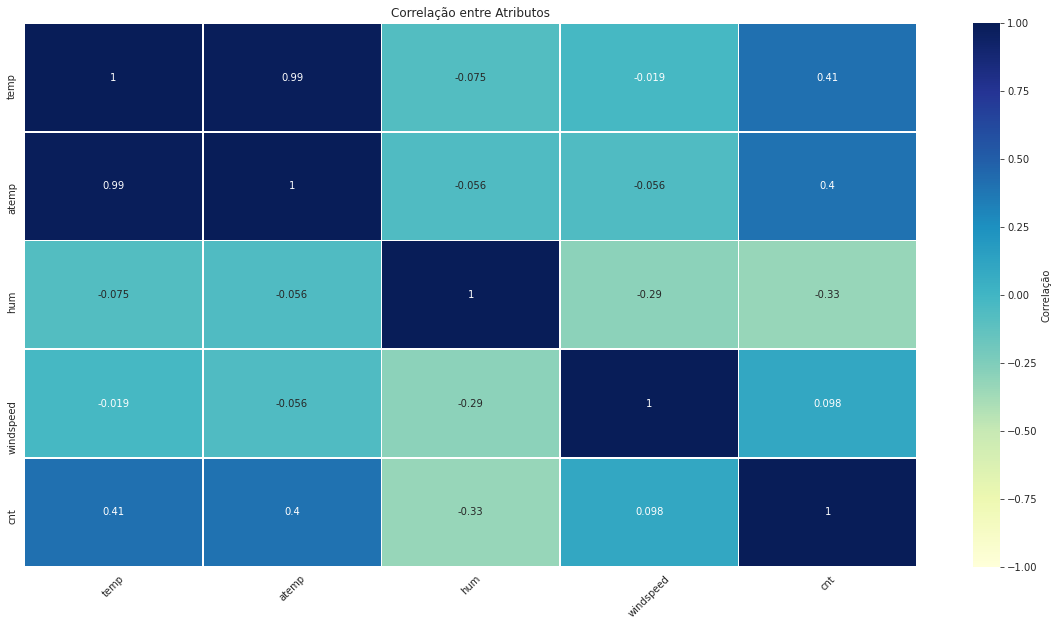

In [33]:
f, ax = plt.subplots(figsize=(20, 10))
plt.title("Correlação entre Atributos")
heat_map = sns.heatmap(base_nova.corr(), 
            annot=True, 
            vmin = -1,
            vmax = 1,
            linewidths=.5, 
            cmap="YlGnBu", 
            center=0, 
            ax=ax, 
            cbar_kws={'label': 'Correlação'})

heat_map.set_yticklabels(labels)
heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                         rotation=45, 
                         horizontalalignment='center')
plt.show()

In [34]:
base[["hum"]] = base[["hum"]].fillna(base[["hum"]].mean(), inplace=False)
base[["cnt"]] = base[["cnt"]].fillna(base[["cnt"]].mean(), inplace=False)
base[["casual"]] = base[["casual"]].fillna(base[["casual"]].mean(), inplace=False)


In [35]:
base

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.000000,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.000000,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.000000,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.000000,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.000000,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.000000,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,35.416317,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.000000,48.0,61.0


In [36]:
# Variável independente
X = base.loc[:, ['hum', 'casual']].values

# Variável dependente
Y = base.loc[:, 'cnt'].values

In [37]:
X.shape

(15641, 2)

In [56]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, Y)

previsoes = regressor.predict(X)

In [57]:
previsoes

array([111.21425222, 104.5688863 , 105.12614851, ..., 191.89476367,
       146.22989168, 135.03725861])

In [58]:
regressor.intercept_

173.29337505135578

In [78]:
print('x1 -> ' + str(X[0][0]) + ' e x2 -> ' + str(X[0][1]))

x1 -> 0.8 e x2 -> 8.0


In [79]:
from sklearn.metrics import r2_score # método para o cálculo do R2 - coeficiente de determinação
print('Y = {} * x1 + {} * x2 + {}'.format(regressor.coef_[0], regressor.coef_[1], regressor.intercept_))
var_Y = regressor.coef_[0] * X[0][0] + regressor.coef_[1] * X[0][1] + regressor.intercept_
print('valor previsto: {} = {} * {} + {} * {} + {}'.format(var_Y, regressor.coef_[0], X[0][0], regressor.coef_[1], X[0][1], regressor.intercept_))
print('Coeficiente de Determinação :', r2_score(Y, previsoes))

Y = -99.75012327908327 * x1 + 2.215121974254656 * x2 + 173.29337505135578
valor previsto: 111.2142522221264 = -99.75012327908327 * 0.8 + 2.215121974254656 * 8.0 + 173.29337505135578
Coeficiente de Determinação : 0.4059859251122173


In [81]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X, Y)

previsoes = regressor.predict(X)

In [82]:
from sklearn.metrics import mean_absolute_error
mean_abs_error = mean_absolute_error(Y, previsoes)
mean_abs_error

58.54911405435064

In [83]:
from sklearn.metrics import r2_score
r2_score(Y, previsoes)

0.7098339715834964

In [84]:
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(regressor, out_file=None)
grafico = pydotplus.graph_from_dot_data(dot_data)
grafico.write_pdf('bikeshare.pdf')

True

In [ ]:
indice = [i for i in range(1, 17380)]

In [ ]:
base[["instant"]] = indice

In [ ]:
base[["instant"]].head()

,instant
0,1
1,2
2,3
3,4
4,5


In [ ]:
base[["instant"]].tail()

,instant
17374,17375
17375,17376
17376,17377
17377,17378
17378,17379
